In [2]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

print('Imports imported')

Imports imported


This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


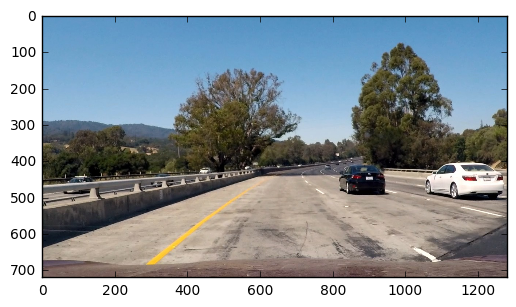

In [3]:
# Visualize Data
image = mpimg.imread('test_images/test1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

In [4]:
# Helper Functions
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


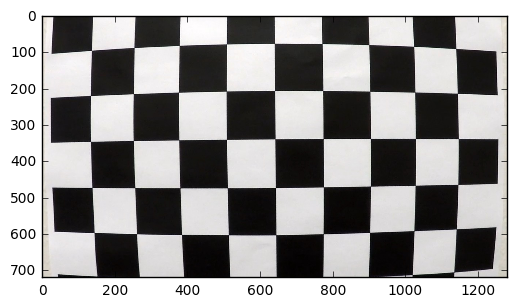

In [5]:
# Calibrate Camera
#### Stage 10

cal_image = mpimg.imread('camera_cal/calibration1.jpg')
#printing out some stats and plotting
print('This image is:', type(cal_image), 'with dimesions:', cal_image.shape)
plt.imshow(cal_image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

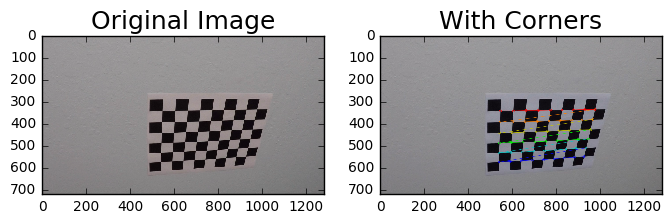

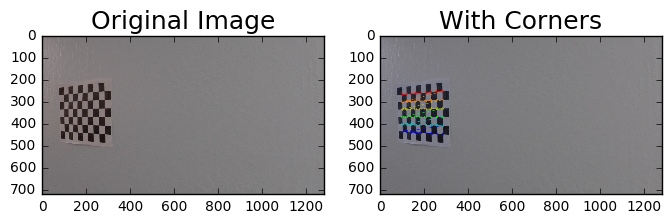

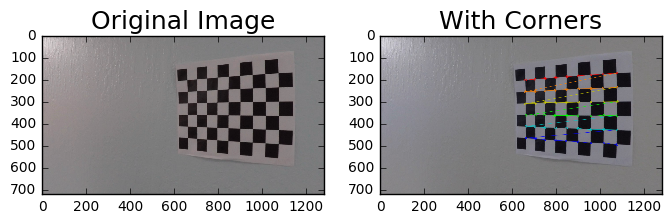

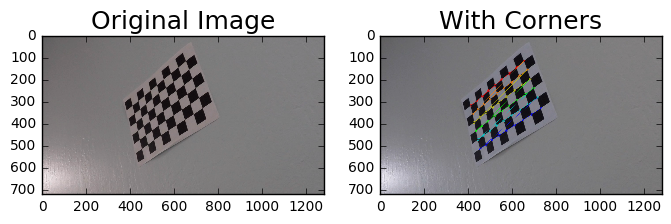

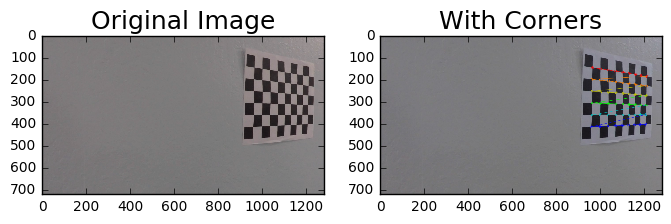

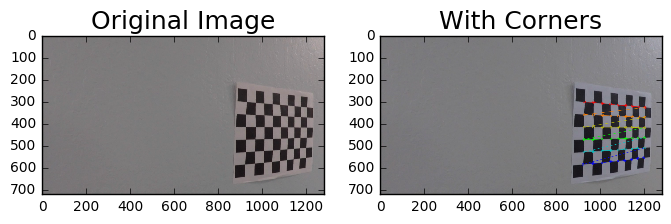

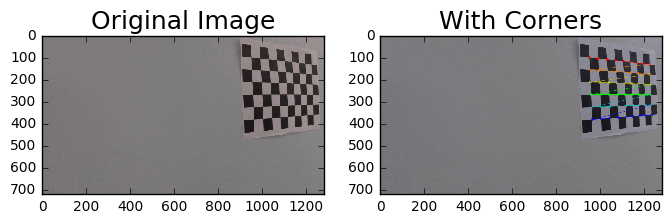

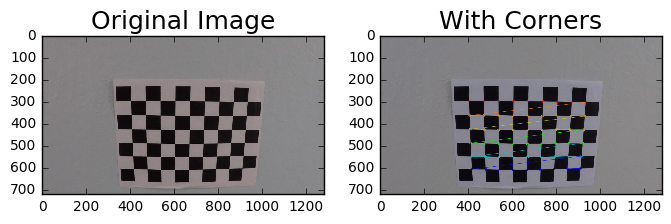

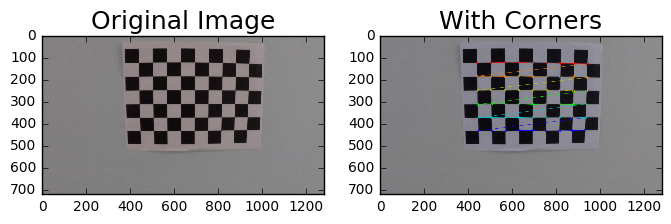

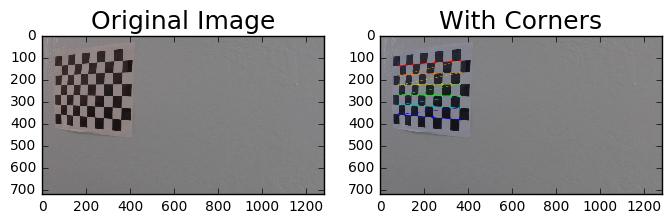

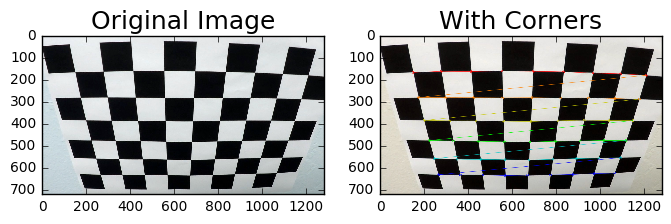

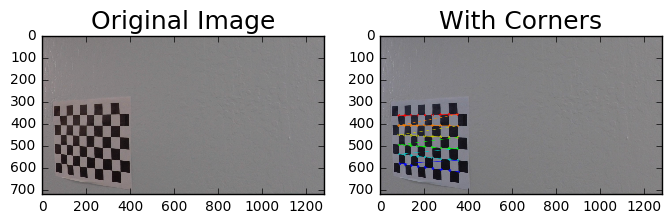

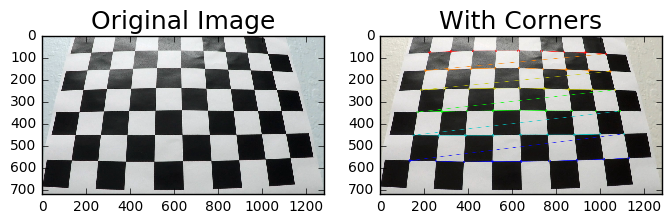

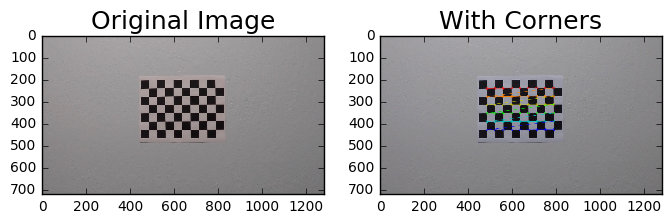

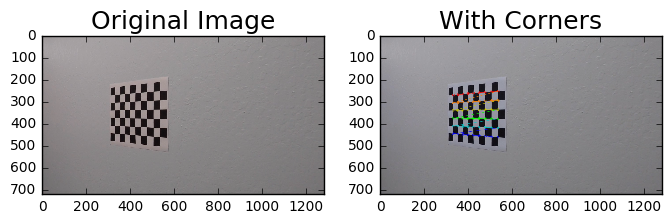

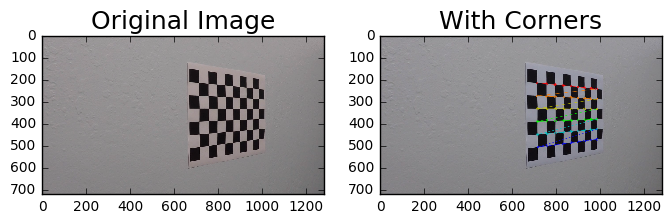

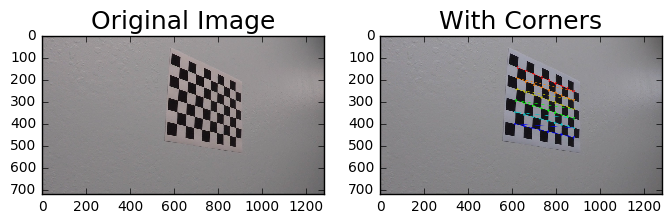

In [10]:
# Calibrate Camera
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('camera_cal/calibration*.jpg')

for image, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = grayscale(img)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
        ax1.imshow(cv2.cvtColor(mpimg.imread(fname), cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image', fontsize=18)
        ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax2.set_title('With Corners', fontsize=18)

In [3]:
# Helper Functions

def weighted_average(value):
    """ Do not forget to put something in place in case a weight does not exist.   Also, cover for 0.
    Assign a global variable? If so check here 
    http://stackoverflow.com/questions/423379
    /using-global-variables-in-a-function-other-than-the-one-that-created-them"""
        
# for each x1,y1,x2,y2 ?
# ( (some_value * number of records) / number of records )

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def hsl(img):
    return True

def hsv(img):
    return True

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=20):

    left_lanes = []
    right_lanes = []
    top_y = image.shape[0]
    
    for line in lines:

        for x1,y1,x2,y2 in line:

                slope = (y2-y1) / (x2-x1)

                if slope > 0:
  
                    right_lanes.append([x1,y1,x2,y2])

                else:
                    
                    left_lanes.append([x1,y1,x2,y2])

        if y1 < y2:
            if top_y > y1:
                top_y = y1
            
    # Work with individual lanes
    if len(left_lanes) > 0:

        for lane in left_lanes:

            slope = ((lane[3] - lane[1]) / (lane[2] - lane[0]))

            if slope != 0:
                if slope < -.1:
                    top_x = lane[0] + (top_y - lane[1]) / slope
                    x_check = lane[0] + (img.shape[0] - lane[1]) / slope
                    if x_check > 175:
                        bottom_x = 175
                    elif x_check < 120:
                        bottom_x = 120
                    else:
                        bottom_x = x_check

        cv2.line(img, (int(bottom_x), img.shape[0]), (int(top_x), int(top_y)), color, thickness)
        # Line going up the middle\n",
        # cv2.line(img, ((int(image.shape[1]/2), img.shape[0])), ((int(image.shape[1]/2)), int(top_y)), [0,0,255], 1)
        
    # Work with individual lanes
    if len(right_lanes) > 0:   
            
        for lane in right_lanes:
            slope = ((lane[3] - lane[1]) / (lane[2] - lane[0]))
            if slope != 0:
    
                if slope > .4:
                    top_x = lane[0] + (top_y - lane[1]) / slope
                    x_check = lane[0] + (img.shape[0] - lane[1]) / slope 
                    
                    if x_check > 875:
                        bottom_x = 875
                    elif x_check < 835:
                        bottom_x = 835
                    else:
                        bottom_x = x_check

        cv2.line(img, (int(bottom_x), img.shape[0]), (int(top_x), int(top_y)), color, thickness)
        
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [ ]:
# Process Image
def process_image(image):
    
    # turn to gray image
    gray = grayscale(image)
    
    # smooth
    kernel_size = 3
    blur_gray = gaussian_blur(gray, kernel_size)
    
    # edge detect
    low_threshold = 75
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    # set a region that should contain line
    imshape = image.shape
    
    # This will need to be dynamic most likely
    vertices = np.array([[(120,imshape[0]),(450, 325), (490, 315), (900,imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)

    
    #  Scale rho, theta values up to be more flexible in your definition of what constitutes a line.
    rho = 1                         # distance resolution in pixels of the Hough grid
    theta = np.pi/180               # angular resolution in radians of the Hough grid
    threshold = 30                  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 15            # minimum number of pixels making up a line
    max_line_gap = 200              # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0   #creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    line_img = hough_lines(masked_edges, rho, theta, threshold,
                            min_line_length, max_line_gap)
    
    result = weighted_img(line_img, image)
    
    return result

In [4]:
# Image 

In [5]:
# Movie 

In [ ]:
# Advanced Movie Test